http://www.learn4master.com/machine-learning/visualize-iris-dataset-using-python


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Silence an annoying pandas plot warning.
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

sns.set(style="white", color_codes=True)

# Load the Iris flower dataset into a Pandas DataFrame.
iris = pd.read_csv("iris.csv")

# Let's take a peak at what's in the iris data.
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [2]:
# Let's see how many examples we have of each class or species.

iris["class"].value_counts()

Setosa        50
Virginica     50
Versicolor    50
Name: class, dtype: int64

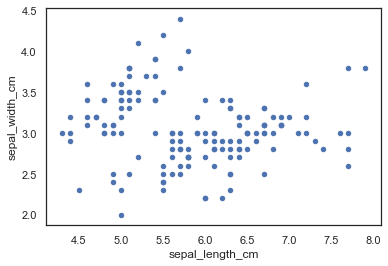

In [3]:
# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the Iris features.

iris.plot(kind="scatter", x="sepal_length_cm", y="sepal_width_cm")

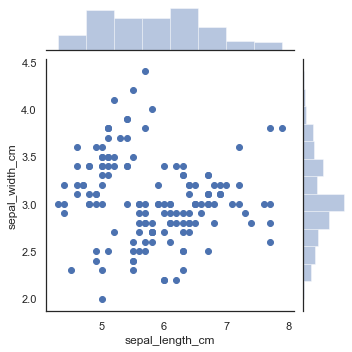

In [4]:
# We can also use the seaborn library to make a similar plot.
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure.

sns.jointplot(x="sepal_length_cm", y="sepal_width_cm", data=iris, height=5)

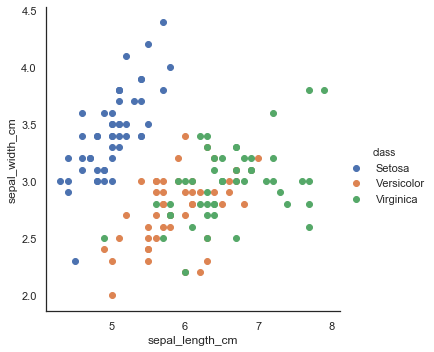

In [5]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species.
sns.FacetGrid(iris, hue="class", height=5) \
   .map(plt.scatter, "sepal_length_cm", "sepal_width_cm") \
   .add_legend()

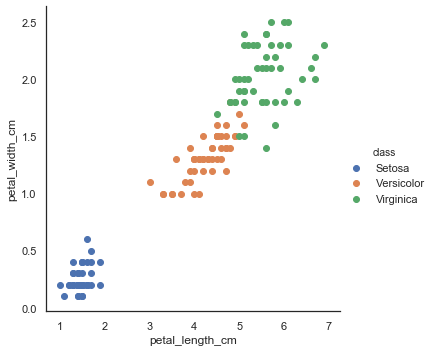

In [10]:
sns.FacetGrid(iris, hue="class", height=5) \
   .map(plt.scatter, "petal_length_cm", "petal_width_cm") \
   .add_legend()

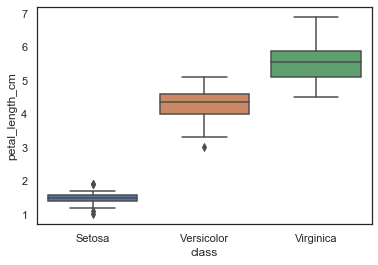

In [7]:
# We can look at an individual feature in Seaborn through a boxplot.

sns.boxplot(x="class", y="petal_length_cm", data=iris)

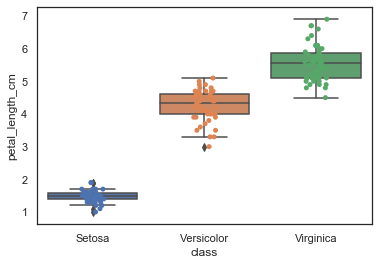

In [9]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot.
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species.
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes.

ax = sns.boxplot(x="class", y="petal_length_cm", data=iris)
ax = sns.stripplot(x="class", y="petal_length_cm", data=iris, jitter=True, edgecolor="gray")

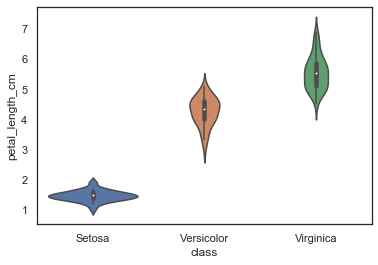

In [10]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot.

sns.violinplot(x="class", y="petal_length_cm", data=iris, size=6)

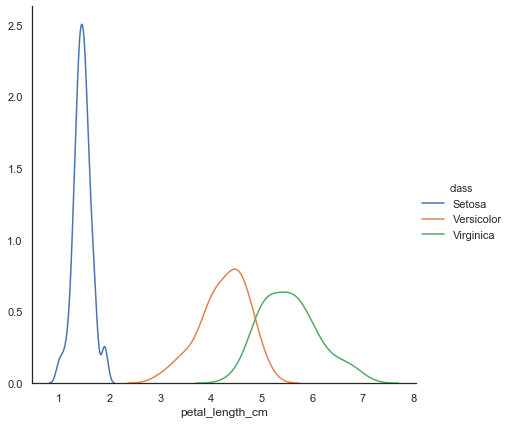

In [11]:
# A final seaborn plot useful for looking at univariate relations is the kde plot,
# which creates and visualizes a kernel density estimate of the underlying feature.

sns.FacetGrid(iris, hue="class", height=6) \
   .map(sns.kdeplot, "petal_length_cm") \
   .add_legend()

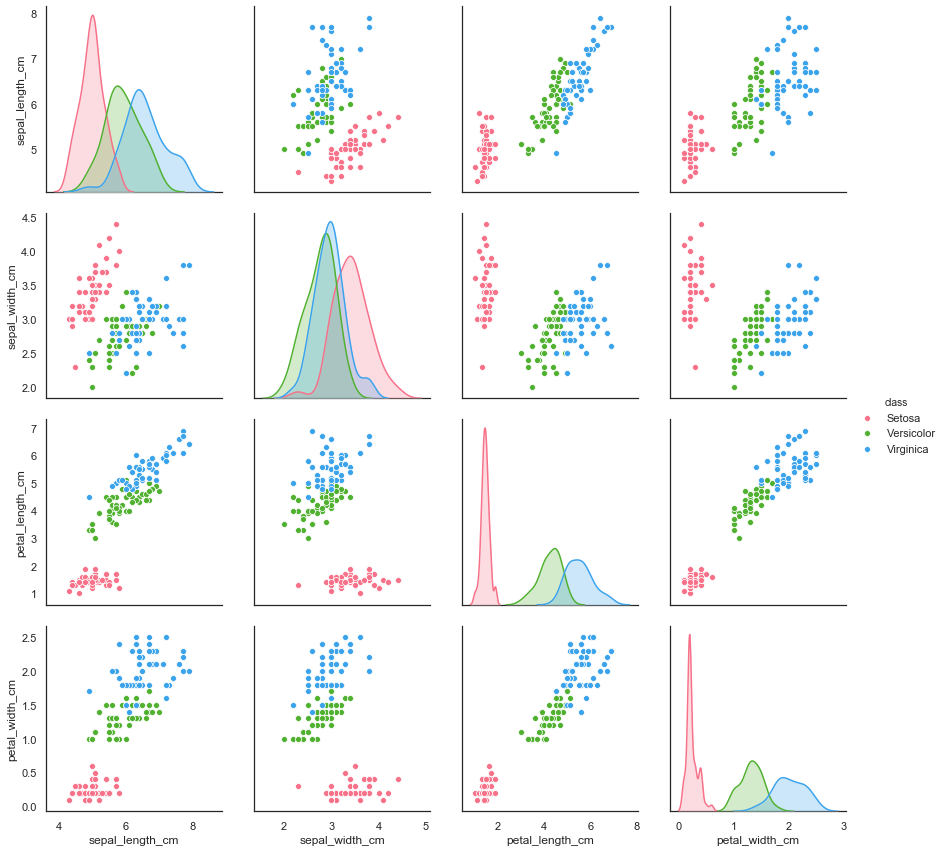

In [12]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features.
#
# From the pairplot, we'll see that the 'Setosa' class or species is separataed from the other
# two across all feature combinations.

sns.pairplot(iris, hue="class", height=3, palette="husl")

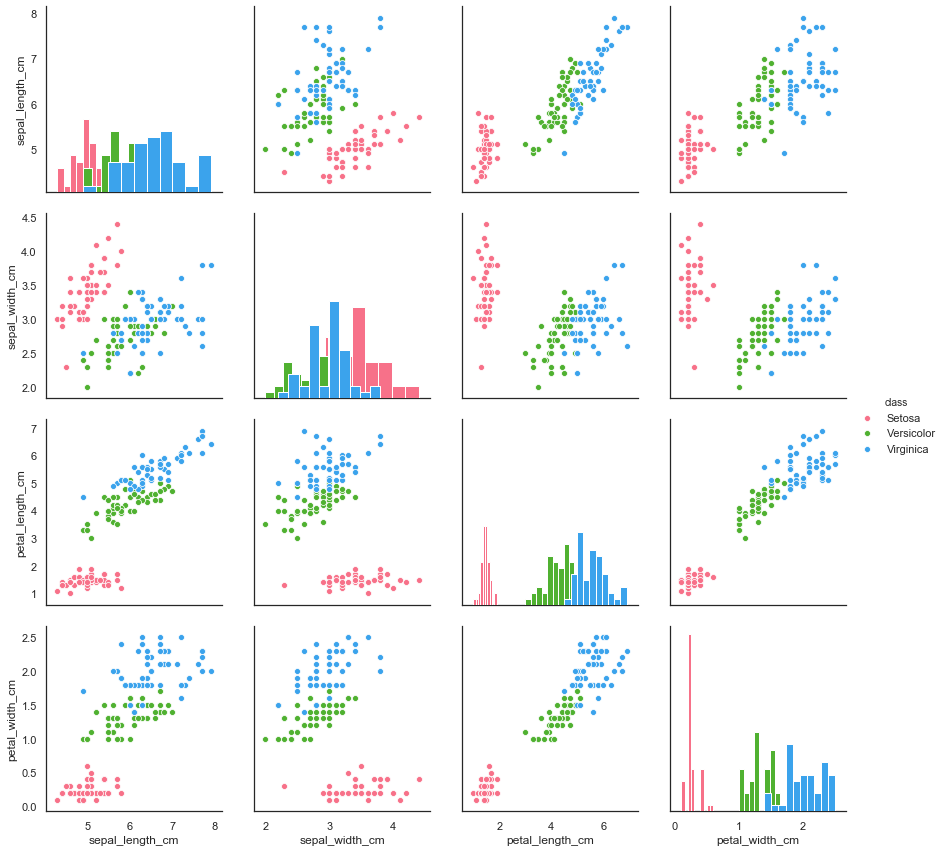

In [13]:
# The diagonal elements in a pairplot show the 'kde' by default.
# We can update these elements to show other things, such as a 'hist'.

sns.pairplot(iris, hue="class", height=3, palette="husl", diag_kind="hist")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ac37630>,
      dtype=object)

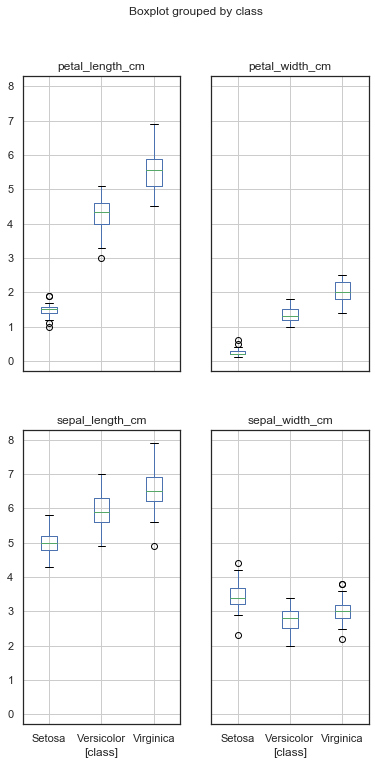

In [17]:
# Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by species.

iris.boxplot(by="class", figsize=(6, 12))

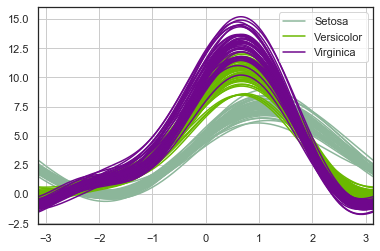

In [18]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these.

pd.plotting.andrews_curves(iris, "class")

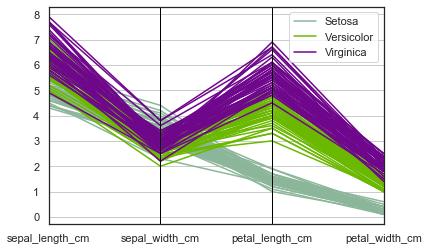

In [19]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample.

pd.plotting.parallel_coordinates(iris, "class")

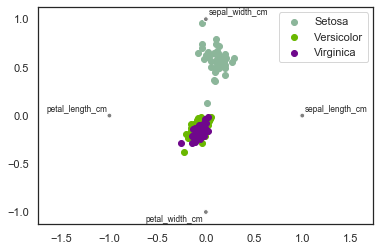

In [20]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature.

pd.plotting.radviz(iris, "class")